# Project Title: 
## Sure Tomorrow insurance company prediction model on insurance benefit analysis 

## Introduction
### The purpose of this project is to determine which model will be more successful in predicting the number of customers who will receive insurance benefits, comparing a dummy model and a prediction model using a linear regression approach.
### Ensuring data protection to prevent breaches and maintaining the authenticity of the machine learning model.

# Data Preprocessing & Exploration

## Initialization

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import math
import matplotlib.pyplot as plt

import sklearn.linear_model 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from IPython.display import display

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [2]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [3]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [4]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
2200,1,23.0,47700.0,2,0
745,0,32.0,35500.0,2,0
124,1,43.0,50200.0,1,1
928,1,21.0,30900.0,2,0
679,1,26.0,31100.0,1,0
4659,0,22.0,18300.0,1,0
1028,1,23.0,38800.0,3,0
2814,0,36.0,40100.0,1,0
4527,1,36.0,45100.0,0,0
1545,1,28.0,13000.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# we may want to fix the age type (from float to int) though this is not critical
df['age'] = df['age'].astype(int)

# write your conversion here if you choose:


In [7]:
# check to see that the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [8]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [9]:
df.isna().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

In [10]:
 df.duplicated().sum()

153

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

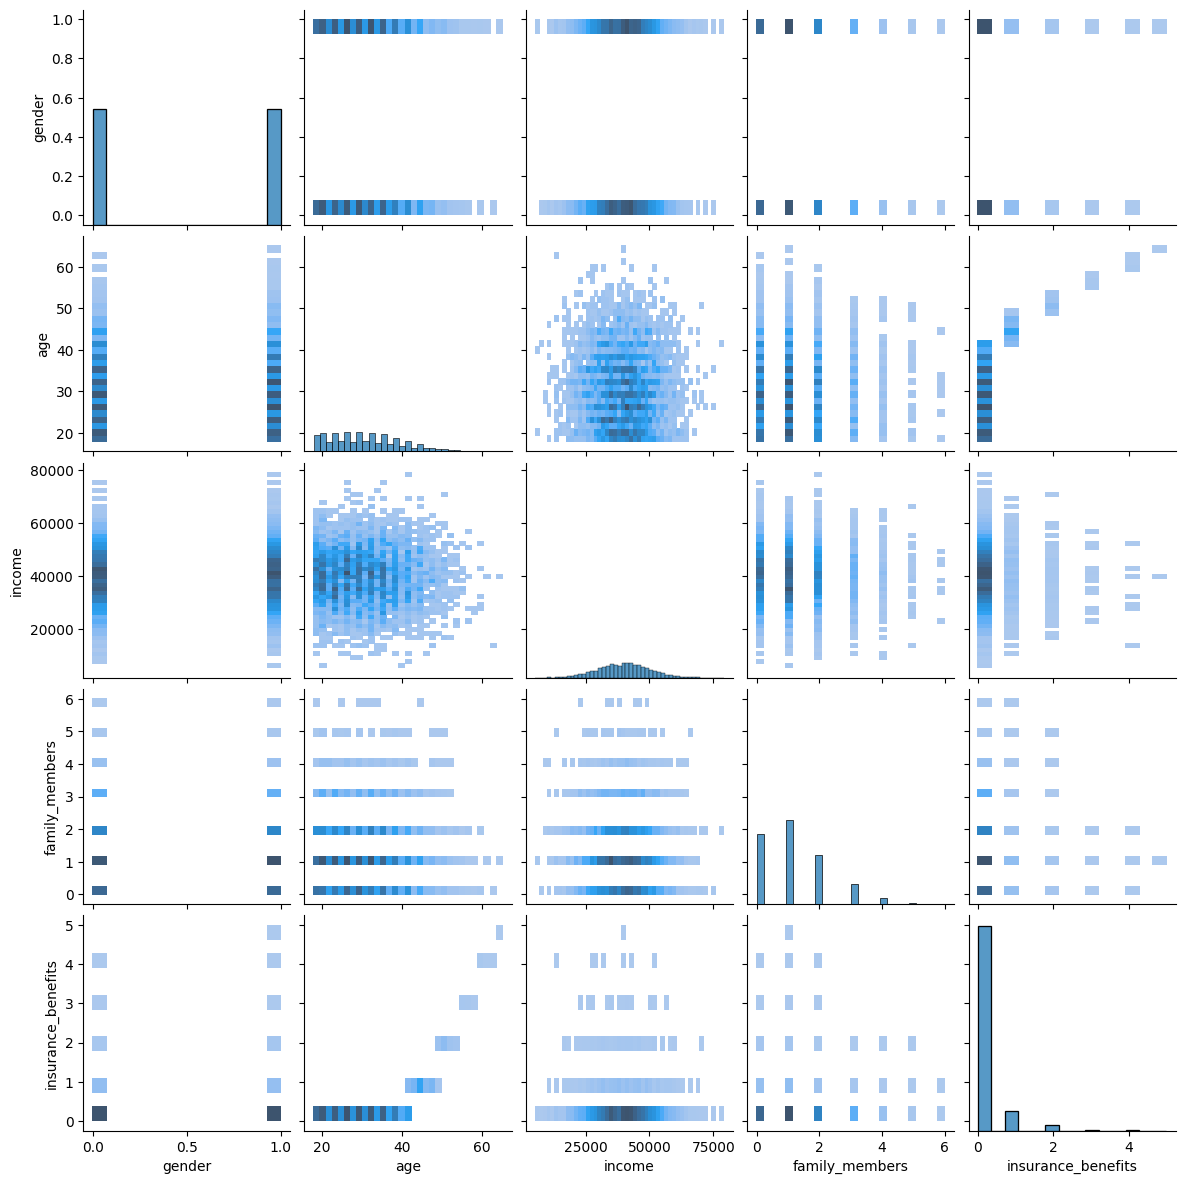

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:
nbrs = NearestNeighbors(n_neighbors = 5, metric = 'euclidean')
nbrs.fit(df[feature_names].values)

NearestNeighbors(metric='euclidean')

In [14]:
 nbrs_distances, nbrs_indices = nbrs.kneighbors(df.iloc[2][feature_names].values.reshape(1, -1), 3, return_distance=True) 

In [15]:
nbrs_distances

array([[  0.        ,   2.44948974, 100.00499988]])

In [16]:
nbrs_indices

array([[   2, 4544, 2031]])


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
You can remove debugging cells if you don't need them anymore. </div>

In [17]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = NearestNeighbors(n_neighbors = 5, metric= metric)
    nbrs.fit(df[feature_names].values)
    nbrs_distances, nbrs_indices = nbrs.kneighbors(df.iloc[n][feature_names].values.reshape(1,-1), k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct! 

</div>

Scaling the data.

In [18]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [19]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
4102,1.0,0.338462,0.513924,0.000000,0
3080,0.0,0.476923,0.368354,0.166667,0
290,1.0,0.338462,0.353165,0.000000,0
740,1.0,0.461538,0.567089,0.500000,0
3449,1.0,0.476923,0.425316,0.333333,0


In [20]:
 get_knn(df,5,5, 'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
5,1,43,41000.0,2,1,0.000000
1995,0,45,41000.0,0,1,3.000000
3972,1,40,41000.0,1,0,3.162278
3801,0,46,41000.0,2,1,3.162278
4763,1,46,41000.0,1,1,3.162278


In [21]:
 get_knn(df,5,5, 'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
5,1,43,41000.0,2,1,0.0
3972,1,40,41000.0,1,0,4.0
4763,1,46,41000.0,1,1,4.0
3801,0,46,41000.0,2,1,4.0
1995,0,45,41000.0,0,1,5.0


In [22]:
get_knn(df_scaled,5,5, 'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
5,1.0,0.661538,0.518987,0.333333,1,0.000000
1147,1.0,0.646154,0.516456,0.333333,0,0.015592
4074,1.0,0.661538,0.501266,0.333333,1,0.017722
1019,1.0,0.646154,0.501266,0.333333,0,0.023468
2962,1.0,0.630769,0.520253,0.333333,0,0.030795


In [23]:
get_knn(df_scaled,5,5, 'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
5,1.0,0.661538,0.518987,0.333333,1,0.000000
4074,1.0,0.661538,0.501266,0.333333,1,0.017722
1147,1.0,0.646154,0.516456,0.333333,0,0.017916
2962,1.0,0.630769,0.520253,0.333333,0,0.032035
1019,1.0,0.646154,0.501266,0.333333,0,0.033106


Now, let's get similar records for a given one for every combination

Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

#### After scaling the data the comparison seems little easier which was not true for not scaled data.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

#### The Manhattan distances are 1.0 more that the Euclidean distances as Manhattan follows grid based path. But Euclidean is the shortest distance possible as we can see in the above data. Manhattan distances are less sensitive to outliers compared to Euclidean so it is preffered to deal with data that might have extreme values.

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [24]:
df['insurance_benefits']. value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: insurance_benefits, dtype: int64

In [25]:
# calculate the target
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [26]:
train, test = train_test_split(df, test_size= 0.3, random_state= 42)
x_train= train[feature_names]
x_test =test[feature_names]
y_train= train['insurance_benefits_received']
y_test= test['insurance_benefits_received']

In [27]:
# check for the class imbalance with value_counts()
df['insurance_benefits_received']. value_counts()

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [28]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [29]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    
    return rng.binomial(n=1, p=P, size=size)

In [30]:
for P in [df['insurance_benefits_received'].sum() / len(df)]:
    print(f'The probability: {P:.2f}')
    
    y_pred_rnd = np.random.random(len(df['insurance_benefits_received']))
    
    
    y_pred_rnd = (y_pred_rnd > 0.5).astype(int)
    
    if (len(df['insurance_benefits_received'])) == len(y_pred_rnd):
        eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
        
    print()

The probability: 0.11
F1: 0.19
Confusion Matrix
[[0.4508 0.4364]
 [0.0542 0.0586]]



In [31]:
# Step 3: Build and evaluate the KNN classifier for both original and scaled data
f1_scores_original = []
f1_scores_scaled = []

# Step 4: Calculate F1 scores for k = 1 to 10
for k in range(1, 11):
    # Original data
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_original = knn.predict(x_test)
    f1_original = f1_score(y_test, y_pred_original, average='weighted')
    f1_scores_original.append(f1_original)
    
    # Scaled data
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    knn.fit(x_train_scaled, y_train)
    y_pred_scaled = knn.predict(x_test_scaled)
    f1_scaled = f1_score(y_test, y_pred_scaled, average='weighted')
    f1_scores_scaled.append(f1_scaled)

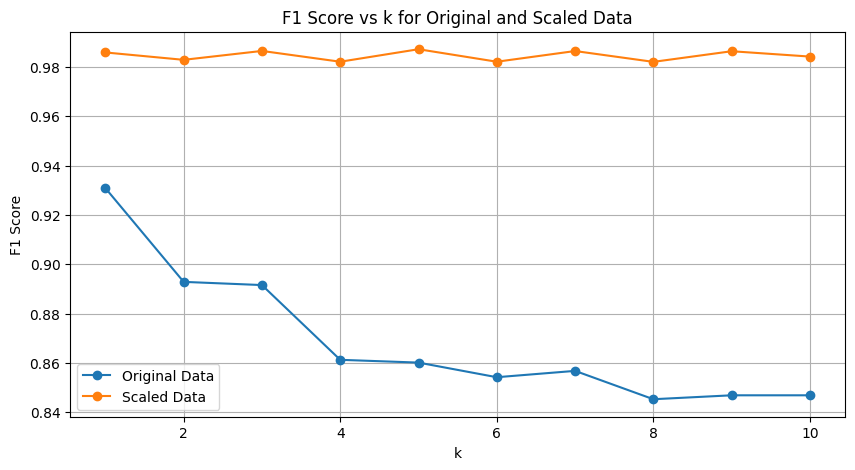

In [32]:

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), f1_scores_original, label='Original Data', marker='o')
plt.plot(range(1, 11), f1_scores_scaled, label='Scaled Data', marker='o')
plt.xlabel('k')
plt.ylabel('F1 Score')
plt.title('F1 Score vs k for Original and Scaled Data')
plt.legend()
plt.grid(True)
plt.show()

####  When knn classifier was used on the scaled data it  provided us with higher f1 score(0.98) so scaled data is better than the original data.

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [33]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)

    def predict(self, X):
        
        # adding the unities
        X2 = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1) 
        y_pred = X2.dot(self.weights) 
        
        return y_pred

In [34]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2 = r2_score(y_true, y_pred)
    print(f'R2: {r2:.2f}')    

In [35]:
x = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits_received'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(x_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(x_test)
eval_regressor(y_test, y_test_pred)
print()

[-6.50583302e-01  2.47409374e-02 -7.31018901e-04  1.36927859e-07
 -6.32915410e-03]
RMSE: 0.23
R2: 0.44



## AS R2 score is 44 % that means that the model is close to actual prediction.

In [36]:

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = MyLinearRegression()

lr.fit(x_train_scaled, y_train)
print(lr.weights)

y_test_pred= lr.predict(x_test_scaled)
eval_regressor(y_test, y_test_pred)
print()


[ 0.11457143  0.20964508 -0.00036542  0.00135641 -0.00688148]
RMSE: 0.23
R2: 0.44



#### The result with original data and scaled data is similar. This is because the model fitting metrics like r2 or RMSE will not be affected by scaling the data. The overall performance of the model remains similar with both datas. 
#### Second reason can be if the features with larger scale have not really dominated the features with lower scale but this is not true for our dataframe.

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [37]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]
df_pn

,gender,age,income,family_members
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0
...,...,...,...,...
4995,0,28,35700.0,2
4996,0,34,52400.0,1
4997,0,20,33900.0,2
4998,1,22,32700.0,3


In [38]:
X = df_pn.to_numpy()
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Generating a random matrix $P$.

In [39]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

Checking the matrix $P$ is invertible

In [40]:
P_inv = np.matmul(P, np.linalg.inv(P))
P_inv

array([[ 1.00000000e+00, -1.69848573e-16, -7.58122972e-17,
        -1.13112497e-16],
       [-6.94895396e-17,  1.00000000e+00, -7.10568689e-17,
         3.59096970e-17],
       [-1.21269339e-16, -8.01461326e-17,  1.00000000e+00,
         4.30764008e-19],
       [-3.60694539e-16, -5.55430227e-16,  3.08072404e-16,
         1.00000000e+00]])

####  No error came in the code while running that means P is invertible.

Can you guess the customers' ages or income after the transformation?

#### No it can't be.

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.


#### Yes original data can be recoved if P inverse is multiplied on the both side of equation.

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [41]:
## The original data 
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

### The reason for some values to change are as follows:
#### When we changed the data frame (df) to numpy array X the data looks different as different column has different data type as income is float and age is int. Dataframe is capable of handling multiple data types in single structure but numpy array is not. The elements in numpy array should be in same data type. The numpy array will also change the shape if the dataframe has mixed data types.
#### In df the data was in column labels and row index but when it changed into numpy array the result was raw data.


In [42]:
## The transformed one
x_trans = X @ P
x_trans

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

In [43]:
## The reversed one 
x_recover = x_trans @ np.linalg.inv(P)
x_recover

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

#### The predicted values with wp will be same as w

#### RMSE shows us the difference between the predicted values and actual values. If the RMSE is higher that means the model prediction have more error. The best model will be with lower RMSE.

**Analytical proof**


####  wp = [(XP)^T XP]^-1(XP)^Ty
####        = [P^TX^TXP]^-1(XP)^Ty
####        = [(P^T X^T X)P]^-1 (XP)^Ty
####         = P^-1[P^TX^TX]^-1(XP)^Ty
####         = P^-1[X^TX]^-1[P^T]^-1(XP)^Ty
####         = P^-1[X^TX]^-1[P^T]^-1P^TX^Ty
####         = P^-1[X^TX]^-1IX^Ty
####         = P^-1[X^TX]^-1X^Ty
         
####         = P^-1[X^TX]^-1X^Ty

 
#### wp        = P^-1w
#### Pwp     = PP^-1w
#### Pwp     = w
#### w         = Pwp

#### y = Xw = XPwp = X'wp
         

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [44]:
def create_invertible_matrix(size):
     
      '''
      The create _invertible_matrix function will create invertible square matrix. 
      It will generate random matrices until it finds one with a non- zero determinant. 
      
      parameters:
        (size) where you can define same rows or columns.
    '''
    while True:
        P = np.random.rand(size, size)
        if np.linalg.det(P) !=0:
            return P

P = create_invertible_matrix(X.shape[1])
P

array([[0.95919094, 0.67668973, 0.85165137, 0.8506338 ],
       [0.2299767 , 0.38874565, 0.45777212, 0.56290557],
       [0.19328428, 0.85277787, 0.50368057, 0.23847273],
       [0.78875697, 0.7949152 , 0.01120673, 0.60594577]])

#### <! The create _invertible_matrix function will create invertible square matrix. It will generate random matrices until it finds one with a non- zero determinant.  It is square matrix as we can see  4 rows and 4 columns !>

In [45]:
XP = create_invertible_matrix(x_trans.shape[1])
XP

array([[0.11393626, 0.79553741, 0.63069807, 0.66671655],
       [0.03011132, 0.47628049, 0.36688419, 0.44932405],
       [0.08924525, 0.52106909, 0.47039521, 0.65592166],
       [0.15351449, 0.80543572, 0.02782813, 0.16803099]])

In [46]:
x= df[[ 'age', 'gender','income','family_members']].to_numpy()
y= df['insurance_benefits_received'].to_numpy()

## Original data 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(x_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(x_test)
eval_regressor(y_test, y_test_pred)
print()


[-6.50583302e-01  2.47409374e-02 -7.31018901e-04  1.36927859e-07
 -6.32915410e-03]
RMSE: 0.23
R2: 0.44



In [47]:
## Obfuscated data 

x_trans = X @ P 

x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(x_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(x_test)
eval_regressor(y_test, y_test_pred)
print()


[-0.65058329 -0.06060855 -0.00513315 -0.00367895  0.07525081]
RMSE: 0.23
R2: 0.44



#### When we ran the linear regression model to test on original data and obfuscated data we can see the results were same for both. The r2 is 0.44 that means the regression model fits  and rmse is 23 % which means there is 23 % error (difference) in prediction and actual values.

#### As earlier we proved with the math formula that the original data and obfuscated data will have same results as we are just trying data masking so there can't be data leak or breach.

#### If the statistical properties like variance, mean and correlation have been preserved during obfuscation process. Then the regression model will give similar regression coefficients and model fit.

# Conclusions

#### The trained model's R2 is 44%, indicating that the model explains 44% of the variability in the data using linear regression. The RMSE (Root Mean Square Error) is 23%, which quantifies the difference between the predicted and actual values. The data transformation and recovery process was successful, maintaining the integrity of the data, as the results remained consistent before and after transformation.

#### Manhattan distances tend to be 1.0 units more than Euclidean distances because Manhattan distance follows a grid-based path, while Euclidean distance is the shortest path between two points. Manhattan distance is less sensitive to outliers compared to Euclidean distance, making it preferable when dealing with data that may contain extreme values.

#### Knn classifier proved scaled data is better than the original data as f1 score is higher. As f1 score indicates better balance between precision and recall.

#### The predicted values using wP will be the same as those obtained with w. RMSE provides a measure of the difference between the predicted and actual values; a higher RMSE indicates greater prediction error. Ideally, a model with a lower RMSE is preferred as it signifies better accuracy.
